## Librerias

In [1]:
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
from glob import glob
import pandas as pd
import numpy as np
import geopandas as gpd
import os
import re

# Datos de dengue

In [2]:
entidades_federativas = {
    1: "Aguascalientes",
    2: "Baja California",
    3: "Baja California Sur",
    4: "Campeche",
    5: "Coahuila",
    6: "Colima",
    7: "Chiapas",
    8: "Chihuahua",
    9: "Ciudad de México",
    10: "Durango",
    11: "Guanajuato",
    12: "Guerrero",
    13: "Hidalgo",
    14: "Jalisco",
    15: "Estado de México",
    16: "Michoacán",
    17: "Morelos",
    18: "Nayarit",
    19: "Nuevo León",
    20: "Oaxaca",
    21: "Puebla",
    22: "Querétaro",
    23: "Quintana Roo",
    24: "San Luis Potosí",
    25: "Sinaloa",
    26: "Sonora",
    27: "Tabasco",
    28: "Tamaulipas",
    29: "Tlaxcala",
    30: "Veracruz",
    31: "Yucatán",
    32: "Zacatecas"
}

## Carga de datos

In [3]:
files_degue = glob('data/dengue/datos_abiertos_dengu*/*.csv')
files_degue

['data/dengue\\datos_abiertos_dengue_230323\\dengue_abierto.csv',
 'data/dengue\\datos_abiertos_dengue_291222\\dengue_abierto.csv',
 'data/dengue\\datos_abiertos_dengue_301221\\Datos abiertos dengue_301221.csv',
 'data/dengue\\datos_abiertos_dengue_311220\\Datos abiertos dengue_311220.csv']

In [23]:
dengue = pd.DataFrame()
for f in files_degue:
    df = pd.read_csv(f)
    print(df.shape)
    dengue = pd.concat([dengue, df], axis=0)
print(dengue.shape)
dengue.head()

(9439, 28)
(57730, 28)
(35413, 28)
(120239, 28)
(222821, 28)


,FECHA_ACTUALIZACION,ID_REGISTRO,SEXO,EDAD_ANOS,ENTIDAD_RES,MUNICIPIO_RES,HABLA_LENGUA_INDIG,INDIGENA,ENTIDAD_UM_NOTIF,MUNICIPIO_UM_NOTIF,...,INMUNOSUPR,CIRROSIS_HEPATICA,EMBARAZO,DEFUNCION,DICTAMEN,TOMA_MUESTRA,RESULTADO_PCR,ESTATUS_CASO,ENTIDAD_ASIG,MUNICIPIO_ASIG
0,2023-03-21,1007423,2,29,23,5,2,2,23,5,...,2,2,2,2,5.0,1,5,3,23,5
1,2023-03-21,1007433,2,25,27,4,2,2,27,4,...,2,2,2,2,5.0,1,5,3,27,4
2,2023-03-21,1007459,2,0,7,89,2,2,7,89,...,2,2,2,2,5.0,2,5,1,7,89
3,2023-03-21,1007452,2,41,12,22,2,2,12,22,...,2,2,2,2,5.0,2,5,1,12,22
4,2023-03-21,1007468,2,10,12,73,2,2,12,73,...,2,2,2,2,5.0,1,5,1,12,73


In [24]:
print(dengue["FECHA_SIGN_SINTOMAS"].max(), dengue["FECHA_SIGN_SINTOMAS"].min())

2023-03-26 2020-01-01


In [5]:
dengue['FECHA_SIGN_SINTOMAS'] = pd.to_datetime(dengue['FECHA_SIGN_SINTOMAS'], format='%Y-%m-%d')

In [6]:
dengue['ENTIDAD_RES'] = dengue['ENTIDAD_RES'].map(entidades_federativas)
dengue['ENTIDAD_UM_NOTIF'] = dengue['ENTIDAD_UM_NOTIF'].map(entidades_federativas)
dengue['ENTIDAD_ASIG'] = dengue['ENTIDAD_ASIG'].map(entidades_federativas)

In [7]:
dengue = dengue[dengue['ESTATUS_CASO'] != 3]
dengue

,FECHA_ACTUALIZACION,ID_REGISTRO,SEXO,EDAD_ANOS,ENTIDAD_RES,MUNICIPIO_RES,HABLA_LENGUA_INDIG,INDIGENA,ENTIDAD_UM_NOTIF,MUNICIPIO_UM_NOTIF,...,INMUNOSUPR,CIRROSIS_HEPATICA,EMBARAZO,DEFUNCION,DICTAMEN,TOMA_MUESTRA,RESULTADO_PCR,ESTATUS_CASO,ENTIDAD_ASIG,MUNICIPIO_ASIG
2,2023-03-21,1007459,2,0,Chiapas,89,2,2,Chiapas,89,...,2,2,2,2,5.0,2,5,1,Chiapas,89
3,2023-03-21,1007452,2,41,Guerrero,22,2,2,Guerrero,22,...,2,2,2,2,5.0,2,5,1,Guerrero,22
4,2023-03-21,1007468,2,10,Guerrero,73,2,2,Guerrero,73,...,2,2,2,2,5.0,1,5,1,Guerrero,73
6,2023-03-21,1007475,1,12,Yucatán,79,2,2,Yucatán,79,...,2,2,2,2,5.0,2,5,1,Yucatán,79
7,2023-03-21,1007462,1,12,Guerrero,35,2,2,Guerrero,35,...,2,2,2,2,5.0,1,5,2,Guerrero,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120234,2020-12-30,841970,1,40,Morelos,25,2,2,Morelos,12,...,2,2,2,2,5.0,1,5,1,Morelos,25
120235,2020-12-30,841973,2,53,Jalisco,97,2,2,Jalisco,98,...,2,2,2,2,5.0,2,5,1,Jalisco,97
120236,2020-12-30,841976,1,31,Nuevo León,4,2,2,Nuevo León,4,...,2,2,2,2,5.0,1,2,2,Nuevo León,4
120237,2020-12-30,841979,2,28,Nuevo León,6,2,2,Nuevo León,6,...,2,2,2,2,5.0,1,5,1,Nuevo León,6


In [8]:
dengue.sort_values("FECHA_ACTUALIZACION")

,FECHA_ACTUALIZACION,ID_REGISTRO,SEXO,EDAD_ANOS,ENTIDAD_RES,MUNICIPIO_RES,HABLA_LENGUA_INDIG,INDIGENA,ENTIDAD_UM_NOTIF,MUNICIPIO_UM_NOTIF,...,INMUNOSUPR,CIRROSIS_HEPATICA,EMBARAZO,DEFUNCION,DICTAMEN,TOMA_MUESTRA,RESULTADO_PCR,ESTATUS_CASO,ENTIDAD_ASIG,MUNICIPIO_ASIG
16655,2020-12-30,777219,1,19,Tabasco,4,2,2,Tabasco,4,...,2,2,2,2,5.0,1,2,2,Tabasco,4
54196,2020-12-30,818777,1,28,Morelos,11,2,2,Morelos,11,...,2,2,2,2,5.0,2,5,1,Morelos,11
54198,2020-12-30,818787,1,7,Jalisco,120,2,2,Jalisco,120,...,2,2,2,2,5.0,2,5,1,Jalisco,120
54199,2020-12-30,818790,2,15,Puebla,156,2,2,Puebla,156,...,2,2,2,2,5.0,2,5,1,Puebla,156
54201,2020-12-30,814754,2,38,Michoacán,53,2,2,Michoacán,53,...,2,2,2,2,5.0,1,5,1,Michoacán,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6447,2023-03-21,1012564,1,42,Veracruz,118,2,2,Veracruz,118,...,2,2,2,2,5.0,1,5,1,Veracruz,118
6448,2023-03-21,1012544,1,23,Quintana Roo,5,2,2,Quintana Roo,5,...,2,2,2,2,5.0,1,5,1,Quintana Roo,5
6450,2023-03-21,1012583,2,29,Quintana Roo,5,2,2,Quintana Roo,5,...,2,2,2,2,5.0,2,5,1,Quintana Roo,5
6436,2023-03-21,1012471,1,21,Quintana Roo,5,2,2,Quintana Roo,5,...,2,2,1,2,5.0,1,5,1,Quintana Roo,5


### Dengue por entidad federativa

In [9]:
dengue.columns

Index(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'SEXO', 'EDAD_ANOS',
       'ENTIDAD_RES', 'MUNICIPIO_RES', 'HABLA_LENGUA_INDIG', 'INDIGENA',
       'ENTIDAD_UM_NOTIF', 'MUNICIPIO_UM_NOTIF', 'INSTITUCION_UM_NOTIF',
       'FECHA_SIGN_SINTOMAS', 'TIPO_PACIENTE', 'HEMORRAGICOS', 'DIABETES',
       'HIPERTENSION', 'ENFERMEDAD_ULC_PEPTICA', 'ENFERMEDAD_RENAL',
       'INMUNOSUPR', 'CIRROSIS_HEPATICA', 'EMBARAZO', 'DEFUNCION', 'DICTAMEN',
       'TOMA_MUESTRA', 'RESULTADO_PCR', 'ESTATUS_CASO', 'ENTIDAD_ASIG',
       'MUNICIPIO_ASIG'],
      dtype='object')

Se mantendrán los registros que sean DICTAMEN = 1 y 4, Confirmado y En estudio, respectivamente.

In [10]:
dengue = dengue[dengue['DICTAMEN'].isin([1,4])]

In [11]:
dengue['DICTAMEN'].unique()

array([4., 1.])

In [12]:
dengue.HEMORRAGICOS.unique()

array([2, 1], dtype=int64)

### Datos geograficos entidades federativas

In [13]:
mexico_ine = pd.read_csv('data/mexico_ent/INE_ENTIDAD_2020.CSV', encoding='latin-1')
mexico_ine = mexico_ine[['ENT', 'POBTOT']]
mexico_ine.rename(columns={'ENT': 'CVE_ENT'}, inplace=True)

In [14]:
mexico_ent = gpd.read_file('data/mexico_ent/00ent.shp')

In [15]:
mexico_ent['CVE_ENT'] = mexico_ent['CVE_ENT'].astype(int)
mexico_ent = mexico_ent.merge(mexico_ine, on='CVE_ENT')

In [16]:
df = dengue.groupby('ENTIDAD_RES').agg({'ENTIDAD_RES': 'count'})
df.rename(columns={'ENTIDAD_RES': 'CASOS'}, inplace=True)
df.reset_index(inplace=True)
df.rename(columns={'ENTIDAD_RES': 'NOMGEO'}, inplace=True)
df.shape

(25, 2)

In [17]:
mexico_ent = mexico_ent.merge(df, on='NOMGEO', how='left')
mexico_ent.head()

,CVEGEO,CVE_ENT,NOMGEO,geometry,POBTOT,CASOS
0,01,1,Aguascalientes,"POLYGON ((2470517.824 1155028.588, 2470552.248...",1425607,NaN
1,02,2,Baja California,"MULTIPOLYGON (((1313480.513 1831458.607, 13135...",3769020,2.0
2,03,3,Baja California Sur,"MULTIPOLYGON (((1694656.344 1227647.637, 16946...",798447,1.0
3,04,4,Campeche,"MULTIPOLYGON (((3544897.199 946994.621, 354491...",928363,3.0
4,05,5,Coahuila de Zaragoza,"POLYGON ((2469954.193 1978522.993, 2469982.807...",3146771,NaN


In [18]:
mexico_ent['DENSIDAD'] = mexico_ent['CASOS'] / mexico_ent['POBTOT'] * 100000
mexico_ent

,CVEGEO,CVE_ENT,NOMGEO,geometry,POBTOT,CASOS,DENSIDAD
0,01,1,Aguascalientes,"POLYGON ((2470517.824 1155028.588, 2470552.248...",1425607,NaN,NaN
1,02,2,Baja California,"MULTIPOLYGON (((1313480.513 1831458.607, 13135...",3769020,2.0,0.053064
2,03,3,Baja California Sur,"MULTIPOLYGON (((1694656.344 1227647.637, 16946...",798447,1.0,0.125243
3,04,4,Campeche,"MULTIPOLYGON (((3544897.199 946994.621, 354491...",928363,3.0,0.323149
4,05,5,Coahuila de Zaragoza,"POLYGON ((2469954.193 1978522.993, 2469982.807...",3146771,NaN,NaN
5,06,6,Colima,"MULTIPOLYGON (((1157633.318 768573.524, 115772...",731391,7.0,0.957080
6,07,7,Chiapas,"POLYGON ((3560747.319 695090.732, 3561146.749 ...",5543828,12.0,0.216457
7,08,8,Chihuahua,"POLYGON ((1961978.327 2201082.365, 1961978.967...",3741869,NaN,NaN
8,09,9,Ciudad de México,"POLYGON ((2802175.660 843326.718, 2801806.564 ...",9209944,1.0,0.010858
9,10,10,Durango,"POLYGON ((2107050.444 1641943.398, 2109767.526...",1832650,NaN,NaN


In [19]:
mexico_ent.sort_values('DENSIDAD', ascending=False, inplace=True)

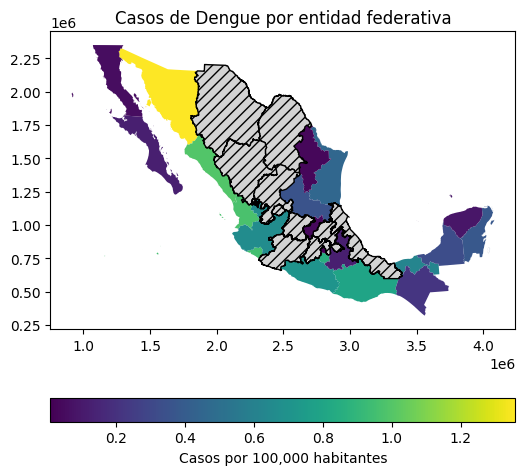

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

mexico_ent.plot(
  column='DENSIDAD', 
  ax=ax, 
  legend=True, 
  legend_kwds={'label': "Casos por 100,000 habitantes", 'orientation': "horizontal"},
  missing_kwds={"color": "lightgrey", "edgecolor": "black", "hatch": "///", "label": "Missing values"}
  )

plt.title('Casos de Dengue por entidad federativa')
plt.show()

### Municipios

In [20]:
municipios_seleccionados = mexico_ent[['CVE_ENT','NOMGEO','DENSIDAD']].head(5)
municipios_seleccionados

,CVE_ENT,NOMGEO,DENSIDAD
25,26,Sonora,1.358308
24,25,Sinaloa,0.991099
17,18,Nayarit,0.971301
5,6,Colima,0.957080
16,17,Morelos,0.862279


In [21]:
dengue_seleccionados = dengue[dengue['ENTIDAD_RES'].isin(municipios_seleccionados['NOMGEO'])]
dengue_seleccionados

,FECHA_ACTUALIZACION,ID_REGISTRO,SEXO,EDAD_ANOS,ENTIDAD_RES,MUNICIPIO_RES,HABLA_LENGUA_INDIG,INDIGENA,ENTIDAD_UM_NOTIF,MUNICIPIO_UM_NOTIF,...,INMUNOSUPR,CIRROSIS_HEPATICA,EMBARAZO,DEFUNCION,DICTAMEN,TOMA_MUESTRA,RESULTADO_PCR,ESTATUS_CASO,ENTIDAD_ASIG,MUNICIPIO_ASIG
2349,2023-03-21,1004314,1,80,Sonora,33,1,1,Sonora,33,...,2,2,2,1,4.0,2,5,1,Sonora,33
6269,2023-03-21,1001845,1,11,Nayarit,11,2,2,Nayarit,17,...,2,2,2,1,4.0,1,2,2,Nayarit,11
1287,2022-12-12,928581,2,55,Sinaloa,1,2,2,Sinaloa,1,...,2,2,2,1,1.0,1,2,2,Sinaloa,1
3596,2022-12-12,996447,2,20,Sinaloa,10,2,2,Sinaloa,1,...,2,2,2,1,4.0,1,2,2,Sinaloa,10
4692,2022-12-12,988020,1,19,Sonora,29,1,1,Sonora,30,...,2,2,2,1,4.0,1,5,2,Sonora,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109510,2020-12-30,875030,2,19,Nayarit,17,2,2,Nayarit,17,...,2,2,2,1,4.0,1,2,2,Nayarit,17
111290,2020-12-30,875050,1,84,Sinaloa,12,2,2,Sinaloa,12,...,2,2,2,1,4.0,2,5,1,Sinaloa,12
113325,2020-12-30,878394,2,74,Nayarit,7,2,2,Jalisco,39,...,2,2,2,1,4.0,1,5,2,Nayarit,7
118770,2020-12-30,880573,1,11,Sinaloa,16,2,2,Sinaloa,12,...,2,2,2,1,4.0,1,5,1,Sinaloa,16


In [22]:
files_mun = glob('data/municipios/*/conjunto_de_datos/*.shp')
files_mun

['data/municipios\\06_colima\\conjunto_de_datos\\06mun.shp',
 'data/municipios\\17_morelos\\conjunto_de_datos\\17mun.shp',
 'data/municipios\\18_nayarit\\conjunto_de_datos\\18mun.shp',
 'data/municipios\\25_sinaloa\\conjunto_de_datos\\25mun.shp',
 'data/municipios\\26_sonora\\conjunto_de_datos\\26mun.shp']

In [23]:
gdf_mun = gpd.GeoDataFrame()

for f in files_mun:
  gdf = gpd.read_file(f)
  gdf['CVE_ENT'] = gdf['CVE_ENT'].astype(int)
  gdf['CVE_ENT'].replace(entidades_federativas, inplace=True)
  gdf['CVE_MUN'] = gdf['CVE_MUN'].astype(int)
  
  mun_selected = dengue_seleccionados[dengue_seleccionados['ENTIDAD_RES'] == gdf['CVE_ENT'].unique()[0]]['MUNICIPIO_RES'].unique()
  gdf = gdf[gdf['CVE_MUN'].isin(mun_selected)]
  
  # reprojectar a WGS84
  gdf = gdf.to_crs(epsg=4326)
  
  gdf_mun = pd.concat([gdf_mun, gdf], axis=0, ignore_index=True)
  
gdf_mun.to_file('data/municipios_seleccionados.shp')
gdf_mun.head()

,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,geometry
0,06004,Colima,4,Coquimatlán,"POLYGON ((-104.04851 19.30255, -104.04690 19.3..."
1,06010,Colima,10,Villa de Álvarez,"POLYGON ((-103.68998 19.43223, -103.68910 19.4..."
2,06009,Colima,9,Tecomán,"MULTIPOLYGON (((-114.73734 18.37206, -114.7364..."
3,06002,Colima,2,Colima,"POLYGON ((-103.67887 19.32561, -103.67853 19.3..."
4,06007,Colima,7,Manzanillo,"MULTIPOLYGON (((-104.48607 19.10484, -104.4859..."


### ERA5

In [24]:
era5 = pd.read_csv("data/ERA5/ERA5_Land_mean_values_2020_2023.csv")
era5['region_id'] = era5['region_id'].astype(int)
era5['region_id'].replace(entidades_federativas, inplace=True)
era5.rename(columns={
  'region_id': 'ENTIDAD_RES',
  'date':'FECHA_SIGN_SINTOMAS'
  }, inplace=True)
era5['FECHA_SIGN_SINTOMAS'] = pd.to_datetime(era5['FECHA_SIGN_SINTOMAS'], format='%Y-%m-%d')
era5.drop(columns=['system:index','.geo'], inplace=True)
era5.head()

,FECHA_SIGN_SINTOMAS,ENTIDAD_RES,surface_net_solar_radiation,surface_pressure,temperature_2m,total_precipitation
0,2020-01-01,Baja California Sur,2.134247e+06,98701.231608,287.766367,0.002488
1,2020-01-01,Campeche,3.509537e+06,100301.585572,298.268191,0.000305
2,2020-01-01,Coahuila,1.104217e+06,89380.675663,284.446624,0.000748
3,2020-01-01,Colima,3.107405e+06,95000.606587,294.771764,0.000271
4,2020-01-01,Chiapas,3.682448e+06,92870.038564,294.780402,0.000756


### CHIRPS

In [25]:
import datetime

def milliseconds_to_date(milliseconds):
    # Convertir milisegundos a segundos
    seconds = milliseconds / 1000
    # Crear un objeto datetime a partir de los segundos desde la época Unix (1 de enero de 1970)
    date = datetime.datetime.fromtimestamp(seconds)
    return date


In [26]:
chirps = pd.read_csv("data/chirps/CHIRPS_daily_mean_precip_2020_2023.csv")
chirps.drop(columns=['system:index','.geo'], inplace=True)


chirps['date'] = chirps['date'].apply(milliseconds_to_date)
# sum 6 hours to date column
chirps['date'] = chirps['date'] + datetime.timedelta(hours=6)
chirps["MUNICIPIO_RES"] = [str(x)[-3:] for x in chirps["region_id"]]
chirps["MUNICIPIO_RES"] = chirps["MUNICIPIO_RES"].astype(int)
chirps["ENTIDAD_RES"] = [str(x)[:-3] for x in chirps["region_id"]]
chirps['ENTIDAD_RES'] = chirps['ENTIDAD_RES'].astype(int)
chirps['ENTIDAD_RES'].replace(entidades_federativas, inplace=True)

chirps.rename(columns={'date':'FECHA_SIGN_SINTOMAS'}, inplace=True)
chirps

,FECHA_SIGN_SINTOMAS,precipitation,region_id,MUNICIPIO_RES,ENTIDAD_RES
0,2020-01-01,4.750653,6004,4,Colima
1,2020-01-01,7.577732,6010,10,Colima
2,2020-01-01,0.075933,6009,9,Colima
3,2020-01-01,0.237747,6002,2,Colima
4,2020-01-01,7.806836,6007,7,Colima
...,...,...,...,...,...
46249,2023-03-31,0.000000,26071,71,Sonora
46250,2023-03-31,0.000000,26042,42,Sonora
46251,2023-03-31,0.090269,26018,18,Sonora
46252,2023-03-31,0.000000,26026,26,Sonora


In [27]:
chirps_dengue = chirps.merge(dengue, on=['ENTIDAD_RES', 'MUNICIPIO_RES', 'FECHA_SIGN_SINTOMAS'], how='inner')
chirps_dengue

,FECHA_SIGN_SINTOMAS,precipitation,region_id,MUNICIPIO_RES,ENTIDAD_RES,FECHA_ACTUALIZACION,ID_REGISTRO,SEXO,EDAD_ANOS,HABLA_LENGUA_INDIG,...,INMUNOSUPR,CIRROSIS_HEPATICA,EMBARAZO,DEFUNCION,DICTAMEN,TOMA_MUESTRA,RESULTADO_PCR,ESTATUS_CASO,ENTIDAD_ASIG,MUNICIPIO_ASIG
0,2020-01-13,0.000000,6002,2,Colima,2020-12-30,764060,1,61,2,...,2,2,2,1,1.0,1,5,2,Colima,2
1,2020-02-09,0.000000,6007,7,Colima,2020-12-30,773485,2,23,2,...,2,2,2,1,1.0,2,5,2,Colima,7
2,2020-02-20,0.000000,18004,4,Nayarit,2020-12-30,775263,1,39,2,...,2,2,2,1,1.0,1,2,2,Nayarit,4
3,2020-04-02,0.000000,18015,15,Nayarit,2020-12-30,782256,1,13,2,...,2,2,2,1,1.0,1,2,2,Nayarit,15
4,2020-06-30,0.506235,18015,15,Nayarit,2020-12-30,798214,1,36,2,...,2,2,2,1,1.0,1,5,2,Nayarit,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,2022-11-16,0.000789,25001,1,Sinaloa,2022-12-12,994251,1,42,2,...,2,2,2,1,4.0,1,5,2,Sinaloa,1
102,2022-11-23,0.000000,26018,18,Sonora,2022-12-12,995643,2,69,2,...,2,2,2,1,4.0,1,2,2,Sonora,18
103,2022-11-26,0.000000,25010,10,Sinaloa,2022-12-12,996447,2,20,2,...,2,2,2,1,4.0,1,2,2,Sinaloa,10
104,2023-01-05,0.000000,18011,11,Nayarit,2023-03-21,1001845,1,11,2,...,2,2,2,1,4.0,1,2,2,Nayarit,11
